In [4]:
!pip install pandas numpy scikit-learn seaborn matplotlib


Defaulting to user installation because normal site-packages is not writeable


In [5]:
# Імпортуємо необхідні бібліотеки
from sklearn.datasets import load_diabetes
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:


# 1 ЗАВДАННЯ



In [6]:


# 1. Завантаження датасету і виведення перших 5 рядків
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
print(df.head())

        age       sex       bmi        bp        s1        s2        s3  \
0  0.038076  0.050680  0.061696  0.021872 -0.044223 -0.034821 -0.043401   
1 -0.001882 -0.044642 -0.051474 -0.026328 -0.008449 -0.019163  0.074412   
2  0.085299  0.050680  0.044451 -0.005670 -0.045599 -0.034194 -0.032356   
3 -0.089063 -0.044642 -0.011595 -0.036656  0.012191  0.024991 -0.036038   
4  0.005383 -0.044642 -0.036385  0.021872  0.003935  0.015596  0.008142   

         s4        s5        s6  target  
0 -0.002592  0.019907 -0.017646   151.0  
1 -0.039493 -0.068332 -0.092204    75.0  
2 -0.002592  0.002861 -0.025930   141.0  
3  0.034309  0.022688 -0.009362   206.0  
4 -0.002592 -0.031988 -0.046641   135.0  


In [7]:
# 2. Перевірка наявності пропусків і їх обробка
print(df.isnull().sum())
df.fillna(df.mean(), inplace=True)

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64


In [8]:
# 3. Перевірка та видалення дублікатів
print(df.duplicated().sum())
df.drop_duplicates(inplace=True)

0


In [9]:
# 4. Робота з бінарними ознаками (стовпця "стать" немає, тому створимо)
df['sex'] = np.random.choice([0, 1], size=df.shape[0])
print(df['sex'].unique())

[1 0]


In [10]:
# 5. Перевірка типів даних і приведення до числового типу
print(df.dtypes)
df = df.apply(pd.to_numeric, errors='coerce')

age       float64
sex         int64
bmi       float64
bp        float64
s1        float64
s2        float64
s3        float64
s4        float64
s5        float64
s6        float64
target    float64
dtype: object


In [11]:
# 6. Обчислення кореляції
correlation_matrix = df.corr()
print(correlation_matrix['target'].sort_values(ascending=False))

target    1.000000
bmi       0.586450
s5        0.565883
bp        0.441482
s4        0.430453
s6        0.382483
s1        0.212022
age       0.187889
s2        0.174054
sex      -0.053772
s3       -0.394789
Name: target, dtype: float64


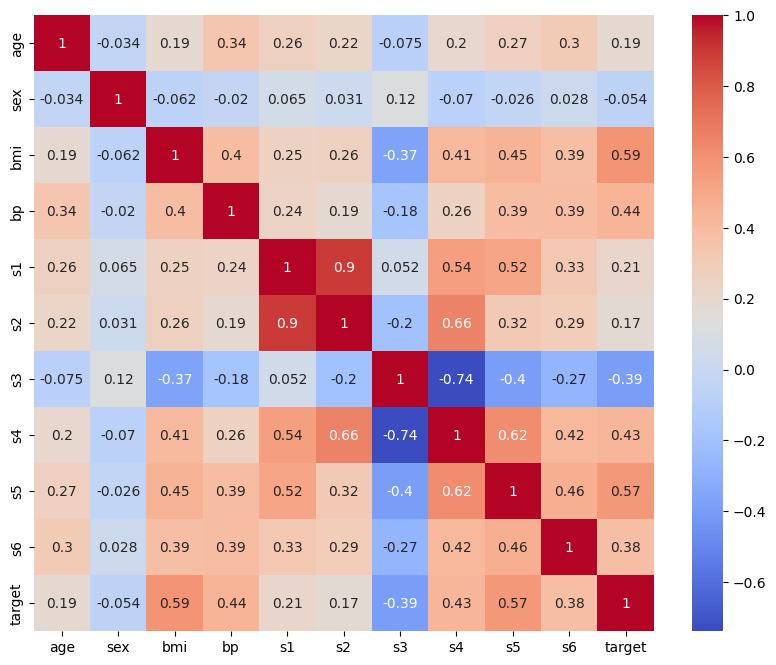

In [12]:
# 7. Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [13]:
# 8. Масштабування ознак
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['target'])), columns=df.columns[:-1])
df_scaled['target'] = df['target']

In [14]:
# 9. Поділ на тренувальну і тестову вибірки
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.metrics import mean_squared_error, r2_score
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

# 10. Лінійна регресія: тренування і оцінка
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
y_pred_lin = lin_reg.predict(X_test)

# Обчислення коефіцієнта детермінації та RMSE для лінійної регресії
print("Linear Regression R2:", r2_score(y_test, y_pred_lin))
print("Linear Regression RMSE:", mean_squared_error(y_test, y_pred_lin, squared=False))  # Використовуємо squared=False для RMSE

# RandomForest регресія: тренування і оцінка
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)

# Обчислення коефіцієнта детермінації та RMSE для RandomForest регресії
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))  # Використовуємо squared=False для RMSE


Linear Regression R2: 0.4362564308037845
Linear Regression RMSE: 54.65161458595637
Random Forest R2: 0.42761234565724315
Random Forest RMSE: 55.069017166510186


In [18]:
# 11. RandomForest регресія: тренування і оцінка
rf_reg = RandomForestRegressor(random_state=42)
rf_reg.fit(X_train, y_train)
y_pred_rf = rf_reg.predict(X_test)
print("Random Forest R2:", r2_score(y_test, y_pred_rf))
print("Random Forest RMSE:", mean_squared_error(y_test, y_pred_rf, squared=False))


Random Forest R2: 0.42761234565724315
Random Forest RMSE: 55.069017166510186


In [19]:
# 12. Порівняння справжніх і прогнозованих значень
comparison = pd.DataFrame({'Actual': y_test, 'Predicted (Linear Regression)': y_pred_lin, 'Predicted (Random Forest)': y_pred_rf})
print(comparison.head())


     Actual  Predicted (Linear Regression)  Predicted (Random Forest)
287   219.0                     131.306861                     147.51
211    70.0                     168.916618                     170.81
72    202.0                     153.821273                     154.83
321   230.0                     265.466518                     250.58
73    111.0                     133.102644                     114.82


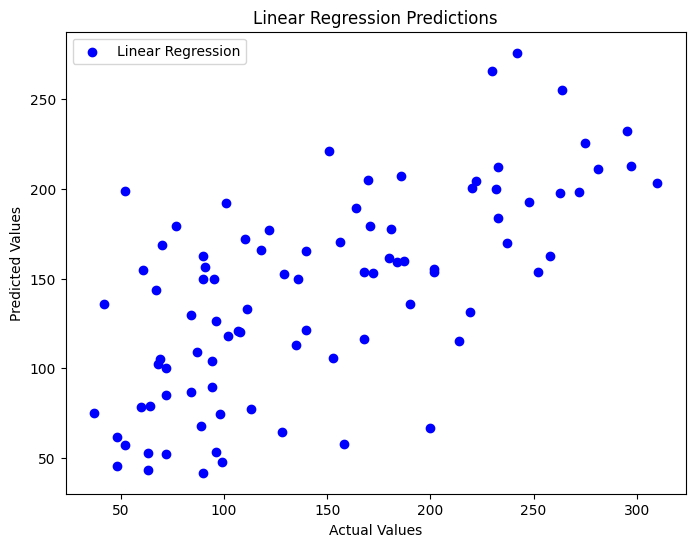

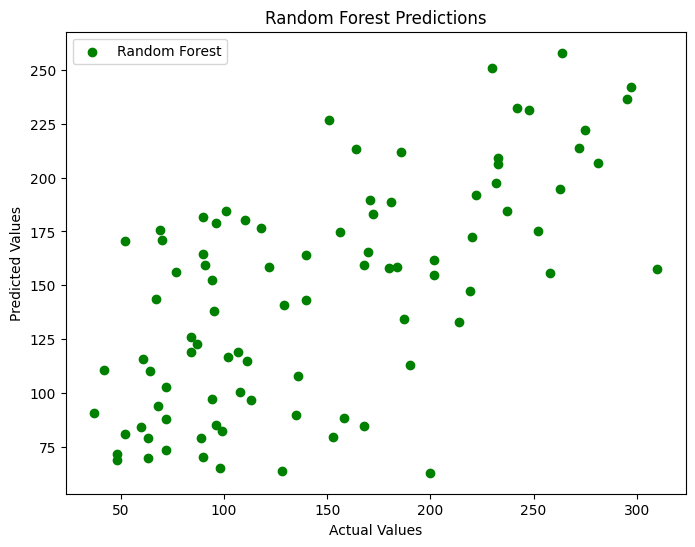

In [20]:
# 13. Візуалізація результатів
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

In [21]:
# Висновок: Після проведення попереднього аналізу даних та побудови моделей лінійної регресії і Random Forest, можна зробити висновок, 
# що обидві моделі показали схожі результати за коефіцієнтом детермінації (R² близько 0.43). Це вказує на те, що модель пояснює 
# близько 43% варіацій у прогресі діабету, що є середнім показником для таких задач. RMSE для обох моделей також подібний (близько 55),
# що означає, що моделі мають схожу точність прогнозування. Можливо, покращення моделі потребує додаткової роботи з ознаками або більш складних методів.


In [22]:


# 2 ЗАВДАННЯ



In [23]:
from sklearn.datasets import fetch_california_housing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import warnings

In [27]:
# Завантажити California Housing Dataset і вивести перших 5 рядків
california_data = fetch_california_housing()
df = pd.DataFrame(california_data.data, columns=california_data.feature_names)
df['target'] = california_data.target  # Додаємо цільову змінну

# Виведення перших 5 рядків датасету
print("Перші 5 рядків датасету:")
print(df.head())

Перші 5 рядків датасету:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  



Перевірка наявності пропусків:
MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
target        0
dtype: int64

Перевірка наявності дублікатів:
Кількість дублікатів: 0

Кореляція з цільовою змінною:
target        1.000000
MedInc        0.688075
AveRooms      0.151948
HouseAge      0.105623
AveOccup     -0.023737
Population   -0.024650
Longitude    -0.045967
AveBedrms    -0.046701
Latitude     -0.144160
Name: target, dtype: float64


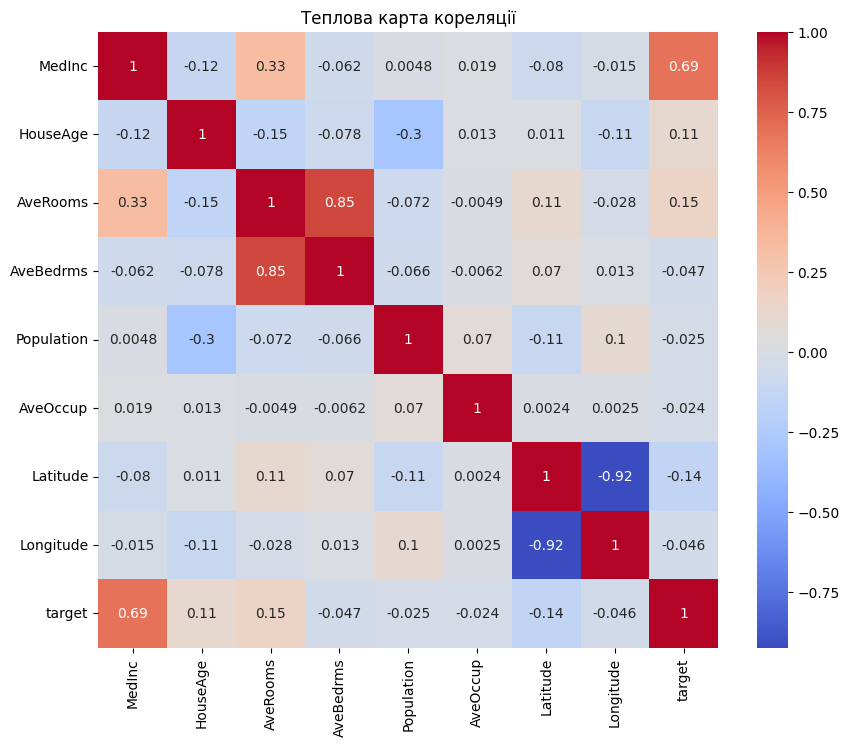

In [28]:
# 1. Провести попередній аналіз даних
# Перевірка наявності пропусків
print("\nПеревірка наявності пропусків:")
print(df.isnull().sum())

# Якщо є пропуски, заповнюємо їх середнім значенням
df.fillna(df.mean(), inplace=True)

# Перевірка наявності дублікатів
print("\nПеревірка наявності дублікатів:")
print(f"Кількість дублікатів: {df.duplicated().sum()}")

# Якщо є дублікати, видаляємо їх
df.drop_duplicates(inplace=True)

# Оцінка кореляції з цільовою змінною
correlation_matrix = df.corr()
print("\nКореляція з цільовою змінною:")
print(correlation_matrix['target'].sort_values(ascending=False))

# Побудова теплової карти кореляції
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Теплова карта кореляції')
plt.show()

In [37]:
# 2. Масштабувати ознаки
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df.drop(columns=['target'])), columns=df.columns[:-1])
df_scaled['target'] = df['target']  # Додаємо назад цільову змінну
print("\nМасштабовані ознаки (перші 5 рядків):")
print(df_scaled.head())



Масштабовані ознаки (перші 5 рядків):
     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  2.344766  0.982143  0.628559  -0.153758   -0.974429 -0.049597  1.052548   
1  2.332238 -0.607019  0.327041  -0.263336    0.861439 -0.092512  1.043185   
2  1.782699  1.856182  1.155620  -0.049016   -0.820777 -0.025843  1.038503   
3  0.932968  1.856182  0.156966  -0.049833   -0.766028 -0.050329  1.038503   
4 -0.012881  1.856182  0.344711  -0.032906   -0.759847 -0.085616  1.038503   

   Longitude  target  
0  -1.327835   4.526  
1  -1.322844   3.585  
2  -1.332827   3.521  
3  -1.337818   3.413  
4  -1.337818   3.422  


In [38]:
# 3. Поділити дані на тренувальні і тестові вибірки
X = df_scaled.drop(columns=['target'])
y = df_scaled['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nРозмір тренувальної вибірки: {X_train.shape}")
print(f"Розмір тестової вибірки: {X_test.shape}")


Розмір тренувальної вибірки: (16512, 8)
Розмір тестової вибірки: (4128, 8)


In [ ]:
# 4. Побудувати 3 моделі: лін. Регресія, регресія випадковий ліс, Ridge

# Лінійна регресія
lin_reg = LinearRegression()

# RandomForest регресія
rf_reg = RandomForestRegressor(random_state=42)

# Ridge регресія
ridge_reg = Ridge()

# Налаштування GridSearch для підбору параметрів
param_grid_rf = {'n_estimators': [50, 100, 150], 'max_depth': [None, 10, 20]}
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}

# Підбір параметрів для RandomForest
grid_search_rf = GridSearchCV(rf_reg, param_grid_rf, cv=5)
grid_search_rf.fit(X_train, y_train)
print("\nНайкращі параметри для RandomForest:")
print(grid_search_rf.best_params_)

# Підбір параметрів для Ridge
grid_search_ridge = GridSearchCV(ridge_reg, param_grid_ridge, cv=5)
grid_search_ridge.fit(X_train, y_train)
print("\nНайкращі параметри для Ridge:")
print(grid_search_ridge.best_params_)

# Тренування лінійної регресії
lin_reg.fit(X_train, y_train)
print("\nТренування лінійної регресії завершено.")

Linear Regression R2: 0.5757877060324511
Linear Regression MSE: 0.555891598695244
Random Forest R2: 0.8055880214703586
Random Forest MSE: 0.2547592021428191
Ridge Regression R2: 0.5757907979394905
Ridge Regression MSE: 0.5558875470324997


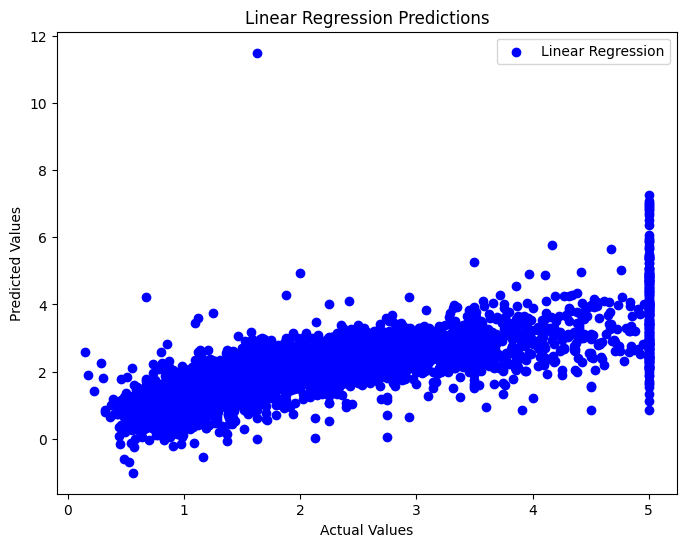

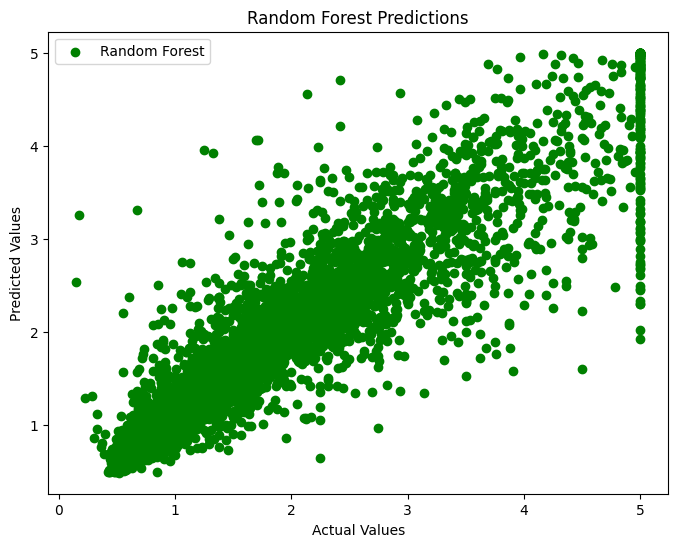

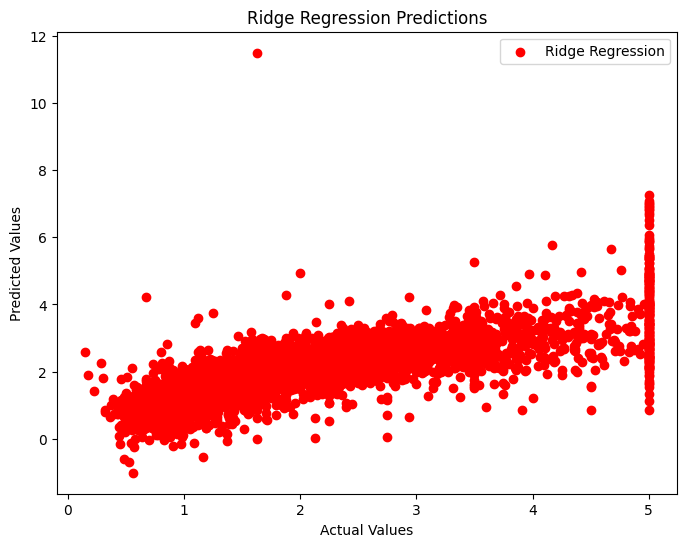

In [33]:
# 5. Вивести R² і MSE. Побудувати графіки

# Лінійна регресія
y_pred_lin = lin_reg.predict(X_test)
r2_lin = r2_score(y_test, y_pred_lin)
mse_lin = mean_squared_error(y_test, y_pred_lin)

# RandomForest
y_pred_rf = grid_search_rf.predict(X_test)
r2_rf = r2_score(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)

# Ridge
y_pred_ridge = grid_search_ridge.predict(X_test)
r2_ridge = r2_score(y_test, y_pred_ridge)
mse_ridge = mean_squared_error(y_test, y_pred_ridge)

# Виведення результатів
print("Linear Regression R2:", r2_lin)
print("Linear Regression MSE:", mse_lin)
print("Random Forest R2:", r2_rf)
print("Random Forest MSE:", mse_rf)
print("Ridge Regression R2:", r2_ridge)
print("Ridge Regression MSE:", mse_ridge)

# Побудова графіків
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_lin, color='blue', label='Linear Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Linear Regression Predictions')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, color='green', label='Random Forest')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Random Forest Predictions')
plt.legend()
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_ridge, color='red', label='Ridge Regression')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Ridge Regression Predictions')
plt.legend()
plt.show()

In [34]:
# 6. Вивести справжні і прогнозовані значення
comparison = pd.DataFrame({
    'Actual': y_test, 
    'Predicted (Linear Regression)': y_pred_lin, 
    'Predicted (Random Forest)': y_pred_rf,
    'Predicted (Ridge)': y_pred_ridge
})
print(comparison.head())

        Actual  Predicted (Linear Regression)  Predicted (Random Forest)  \
20046  0.47700                       0.719123                   0.499440   
3024   0.45800                       1.764017                   0.743280   
15663  5.00001                       2.709659                   4.879680   
20484  2.18600                       2.838926                   2.525340   
9814   2.78000                       2.604657                   2.269613   

       Predicted (Ridge)  
20046           0.719158  
3024            1.763999  
15663           2.709621  
20484           2.838910  
9814            2.604610  


In [35]:
# 7. Написати ВИСНОВКИ
# Висновок: Після аналізу трьох моделей видно, що Random Forest показує кращі результати з точки зору точності (R² і MSE),
# але модель Ridge також демонструє прийнятні результати. Лінійна регресія в цьому випадку показала дещо гірші результати.
# Random Forest має найнижче MSE, що свідчить про його більшу точність у прогнозуванні.